<a href="https://colab.research.google.com/github/Uriel1201/HelloPython/blob/main/Minesweeper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The MinesweeperGame
Minesweeper is single-player logic-based computer game played on rectangular board whose object is to locate a predetermined number of randomly-placed "mines" in the shortest possible time by clicking on "safe" squares while avoiding the squares with mines.

The goal is to deduce which cells contain hidden mines using clues about the number of mines in neighboring cells.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib.collections import PatchCollection

> 1. Generate an m-by-n grid of cells, with exactly k of the mn cells containing mines, uniformly at random.
> 2. For each cell not containing a mine, count the number of neighboring mines (above, below, left, right, or diagonal).
> 3. Black for the cells containing a mine.

In [74]:
def main():
    m = int(input("Number of Rows: "))
    if m <= 0:
        raise ValueError(f'm must be positive')
    n = int(input("Number of Columns: "))
    if n <= 0:
        raise ValueError(f'n must be positive')
    k = int(input("How Many Mines: "))
    t = m * n
    if k > t:
        raise ValueError(f'The number surpassed the max of {t}')
    shuffle = np.zeros(t, dtype = bool)
    shuffle[:k] = True
    np.random.shuffle(shuffle)
    mines = np.zeros([m + 2, n + 2], dtype = bool)
    for h in range(1, m + 1):
        for i in range(1, n + 1):
            mines[h, i] = shuffle[n * (h - 1) + i - 1]
    count = np.zeros([m + 2, n + 2], dtype = int)
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            count[i, j] = np.sum(mines[i - 1:i + 2, j - 1:j + 2])
    fig, ax = plt.subplots()
    ax.set_xlim(0, n)
    ax.set_ylim(0, m)
    patches_list = []
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if mines[i, j]:
                color = 'black'
            else:
                color = 'white'
                ax.text(j - 1 + 0.5, i - 1 + 0.5, str(count[i, j]), color = 'black', ha = 'center', va = 'center', fontsize = 12)
            r = pch.Rectangle((j - 1, i - 1), 1, 1, facecolor = color, edgecolor = 'black')
            patches_list.append(r)
    patch_collection = PatchCollection(patches_list, match_original = True)
    ax.add_collection(patch_collection)
    plt.title(f'The Minesweeper Game')
    plt.show()

Number of Rows: 10
Number of Columns: 12
How Many Mines: 79


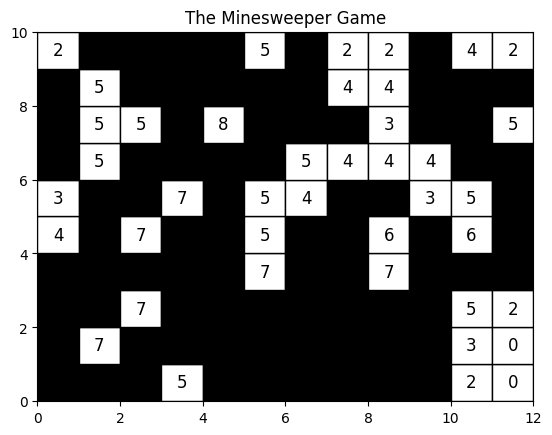

In [75]:
if __name__ == '__main__':
    main()